## Question 1
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

In [6]:
import pandas as pd # load library
import matplotlib.pyplot as plt # visualize package


sheet_id = "16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM"
sheet_name = "Sheet1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df= pd.read_csv(url) #load the data
print(f"Number of sneakers shops :{df['shop_id'].nunique()}")
print(f"Average order value (AOV) of thee sneaker shops is {round(df['order_amount'].sum()/len(df), 2)}")
df.head() # view first 5 entries of dataset

Number of sneakers shops :100
Average order value (AOV) of thee sneaker shops is 3145.13


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


In [9]:
df['order_amount'].mean()

3145.128

 Average order value (AOV) tracks the average dollar amount spent each time a customer places an order on a website or mobile app. To calculate your company's average order value, simply divide total revenue by the number of orders.


 Visualize the Dataset

Order amount and total items has 0.99% correlation
98% of the order amount is below $284.0


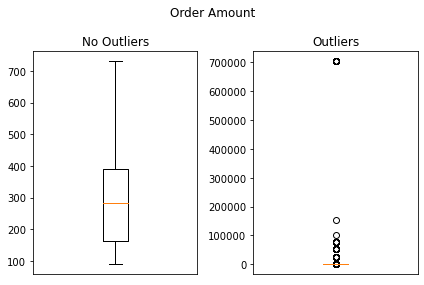

In [16]:
print(f"Order amount and total items has {round(df['order_amount'].corr(df['total_items']), 2)}% correlation")
print(f"98% of the order amount is below ${round(df['order_amount'].quantile(.50), 2)}")
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(df['order_amount'], showfliers=False)
ax[0].set_title("No Outliers")
ax[0].get_xaxis().set_visible(False)
ax[1].boxplot(df['order_amount'], showfliers=True)
ax[1].set_title("Outliers")
ax[1].get_xaxis().set_visible(False)
plt.suptitle('Order Amount')
fig.tight_layout()
plt.show()

The reason for the wrong AOV is due to the presence of outliers. From the graph, the sneakers sold in bulk are outliers that skew up the average in this dataset.
A better way to evaluate this data for sneaker shops owner is to consider all three measures of central tendency (mean, median and mode)

In [24]:
# we create a new column to specify the price for a single sneaker sold for each order.
df['Unit price'] = df['order_amount'] / df['total_items']

#median
print('median - ', df['Unit price'].median())

#mode
print('mode - ', df['Unit price'].mode().tolist())

#mean
print('mean - ', df['Unit price'].mean())

median -  153.0
mode -  [153.0]
mean -  387.7428


What metric would you report for this dataset?
Answer = To enhance overall revenue, I would look at the median value. Median is robust to outliers

What is it's value?
Answer =153

## Question 2
For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

How many orders were shipped by Speedy Express in total?
Answer = 54

What is the last name of the employee with the most orders?
Answer = Peacock 40

Answer = Peacock 40

What product was ordered the most by customers in Germany?  
Answer =Boston Crab Meat 160

SELECT  od.OrderID, pr.ProductName, SUM(od.Quantity) as Total_Quantity, or.CustomerID, c.Country
FROM Products as pr
LEFT JOIN OrderDetails as od
ON pr.ProductID = od.ProductID
LEFT JOIN Orders as or
ON od.OrderID = or.OrderID
LEFT JOIN Customers as c
ON or.CustomerID = c.CustomerID
WHERE c.Country = "Germany"
GROUP BY pr.ProductName
ORDER BY Total_Quantity DESC
LIMIT 1